# **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading csv file and cleaning**

In [2]:
df = pd.read_csv('amazon.csv',  encoding='ISO-8859-1', parse_dates= ['date'])
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [3]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [4]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [5]:
df.shape

(6454, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [7]:
df.duplicated().any()

True

In [8]:
df[df.duplicated()]

,year,state,month,number,date
259,2017,Alagoas,Janeiro,38.0,2017-01-01
2630,1998,Mato Grosso,Janeiro,0.0,1998-01-01
2650,1998,Mato Grosso,Fevereiro,0.0,1998-01-01
2670,1998,Mato Grosso,Março,0.0,1998-01-01
2690,1998,Mato Grosso,Abril,0.0,1998-01-01
2710,1998,Mato Grosso,Maio,0.0,1998-01-01
3586,1998,Paraiba,Janeiro,0.0,1998-01-01
3606,1998,Paraiba,Fevereiro,0.0,1998-01-01
3621,2013,Paraiba,Fevereiro,9.0,2013-01-01
3626,1998,Paraiba,Março,0.0,1998-01-01


In [9]:
df= df.drop_duplicates()
df[df.duplicated()]

,year,state,month,number,date


In [10]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [11]:
df.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


In [12]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [13]:
df['month_eng'] = df['month'].map({'Janeiro': 'Jan',
                                   'Fevereiro': 'Feb',
                                   'Março': 'Mar',
                                   'Abril': 'April',
                                   'Maio': 'May',
                                   'Junho': 'Jun',
                                   'Julho': 'July',
                                   'Agosto': 'Aug',
                                   'Setembro':'Sep',
                                   'Outubro': 'Oct',
                                   'Novembro':'Nov',
                                   'Dezembro': 'Dec'})
df.head()

,year,state,month,number,date,month_eng
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan
1,1999,Acre,Janeiro,0.0,1999-01-01,Jan
2,2000,Acre,Janeiro,0.0,2000-01-01,Jan
3,2001,Acre,Janeiro,0.0,2001-01-01,Jan
4,2002,Acre,Janeiro,0.0,2002-01-01,Jan


# **In which month maximum number of fires reported?**

In [14]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_eng'], dtype='object')

In [15]:
df.nunique()

year           20
state          23
month          12
number       1479
date           20
month_eng      12
dtype: int64

In [16]:
monthlyFire = df.groupby('month_eng', as_index= False)['number'].sum()
monthlyFire

,month_eng,number
0,April,28184.770
1,Aug,88050.435
2,Dec,57535.480
3,Feb,30839.050
4,Jan,47681.844
5,July,92319.113
6,Jun,55997.675
7,Mar,30709.405
8,May,34725.363
9,Nov,85508.054


<ipython-input-32-27a3b33ffe8c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data= monthlyFire, x= 'month_eng', y= 'number', palette= "hls")


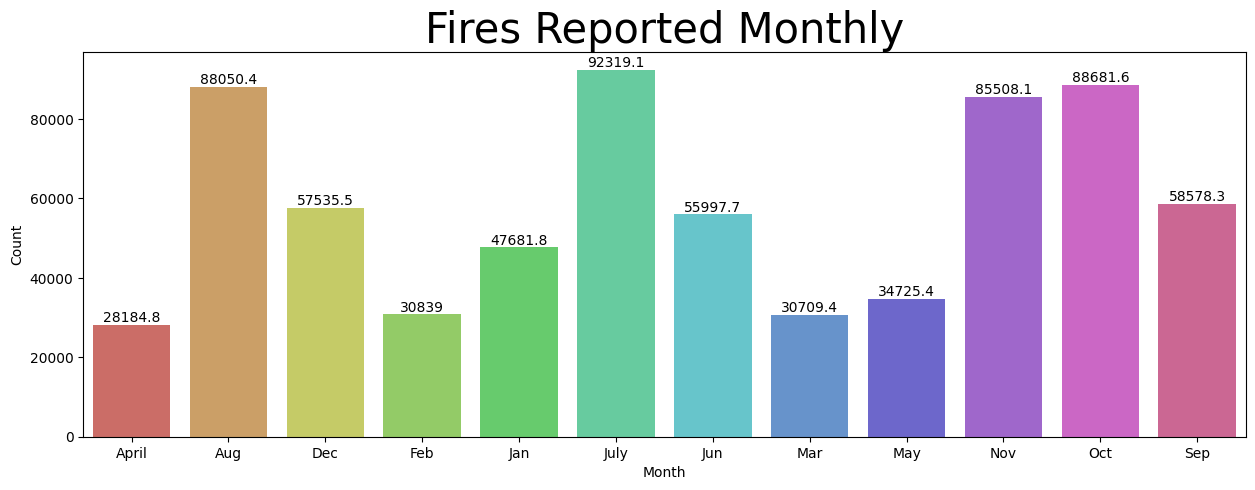

In [32]:
plt.figure(figsize= (15,5))
ax= sns.barplot(data= monthlyFire, x= 'month_eng', y= 'number', palette= "hls")
plt.title('Fires Reported Monthly', size= 30)
plt.xlabel('Month')
plt.ylabel('Count')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

## **In july maximum number of fires reported**

# **In Which Year Maximum Numbers of Forest Fires Were Reported?**

In [18]:
yearlyFire = df.groupby('year', as_index= False)['number'].sum()
yearlyFire

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<ipython-input-33-c3bfda44ec20>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data= yearlyFire, x= 'year', y= 'number', palette= "hls")


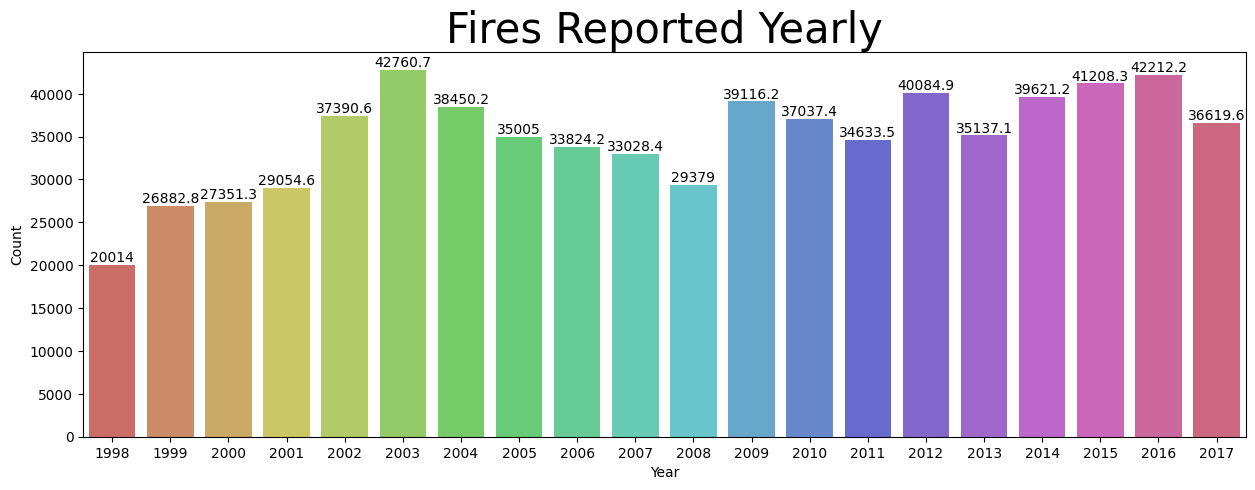

In [33]:
plt.figure(figsize= (15,5))
ax= sns.barplot(data= yearlyFire, x= 'year', y= 'number', palette= "hls")
plt.title('Fires Reported Yearly', size= 30)
plt.xlabel('Year')
plt.ylabel('Count')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

## **In 2003 maximum number of fires reported**

#**In Which State Maximum Numbers of Forest Fires Were Reported?**

In [20]:
fireByState = df.groupby('state', as_index= False)['number'].sum()
fireByState

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<ipython-input-34-eb9ca8a6642a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data= fireByState, x= 'state', y= 'number', palette= "hls")


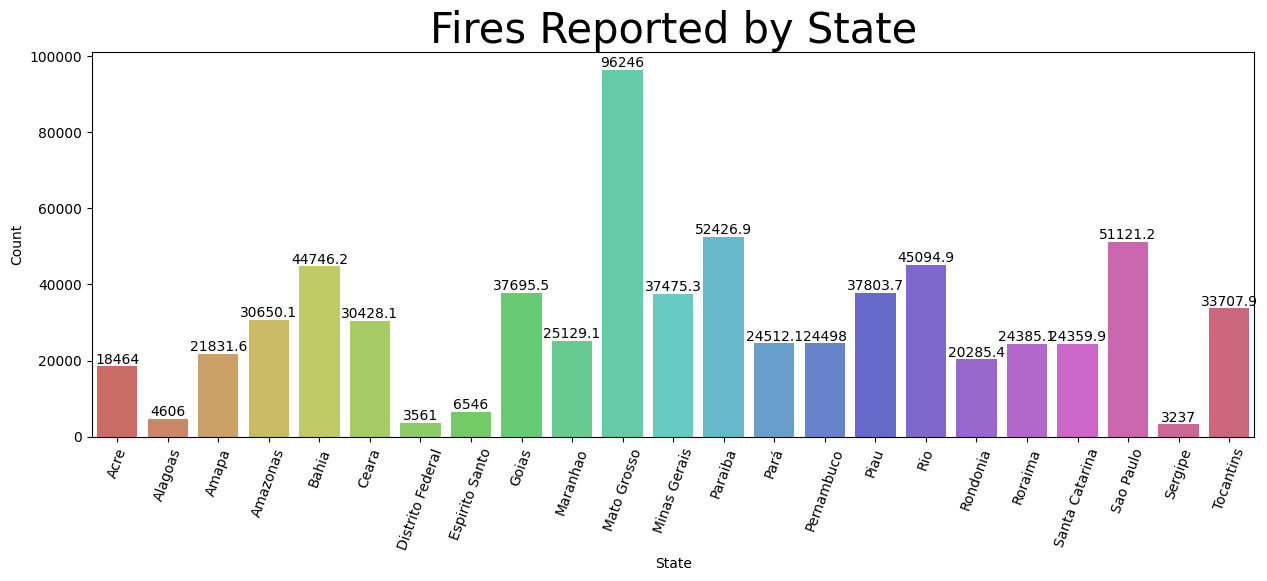

In [34]:
plt.figure(figsize= (15,5))
ax= sns.barplot(data= fireByState, x= 'state', y= 'number', palette= "hls")
plt.title('Fires Reported by State', size= 30)
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation= 70)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

## **According to the bar chart we can see the most fires were reported in Mato Grosso.**

# **Find Total Number of Fires Were Reported in Amazonas**

In [22]:
df[df['state'] == 'Amazonas']['number'].sum()

30650.129

# **Number of Fires Were Reported in Amazonas Yearly**

In [23]:
amazonas_df = df[df['state'] == 'Amazonas']
amazonas_df

,year,state,month,number,date,month_eng
718,1998,Amazonas,Janeiro,0.0,1998-01-01,Jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,Jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,Jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,Jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,Jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,Dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,Dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,Dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,Dec


<ipython-input-35-074554c584f0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data= amazongrp_df, x= 'year', y= 'number', palette= "hls")


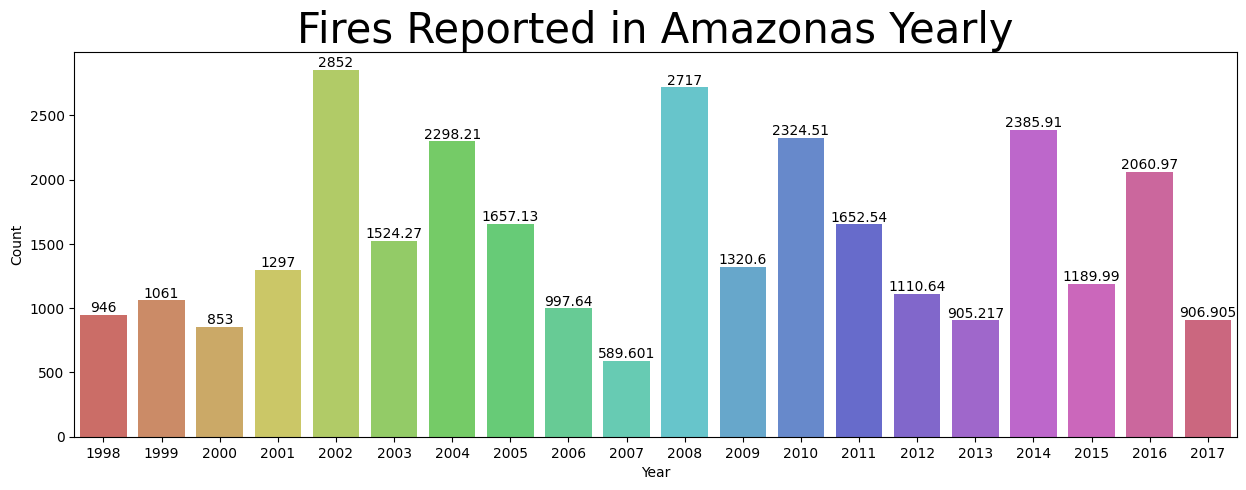

In [35]:
amazongrp_df= amazonas_df.groupby('year', as_index= False)['number'].sum()

plt.figure(figsize= (15,5))
ax= sns.barplot(data= amazongrp_df, x= 'year', y= 'number', palette= "hls")
plt.title('Fires Reported in Amazonas Yearly', size= 30)
plt.xlabel('Year')
plt.ylabel('Count')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

## **According to the bar chart we can see the most fires were reported in 2002**

# **Number of Fires Were Reported in Amazonas (Day Wise)**

In [25]:
state_df = df[df['state'] == 'Amazonas']

day= state_df.groupby(state_df['date'].dt.dayofweek)['number'].sum()

import calendar
day.index = [calendar.day_name[x] for x in range (0,7) ]
day = day.reset_index()
day.rename(columns= {'index': 'day_name'}, inplace= True)
day

,day_name,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<ipython-input-36-467473cdeabd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data= day, x= 'day_name', y= 'number', palette= "hls")


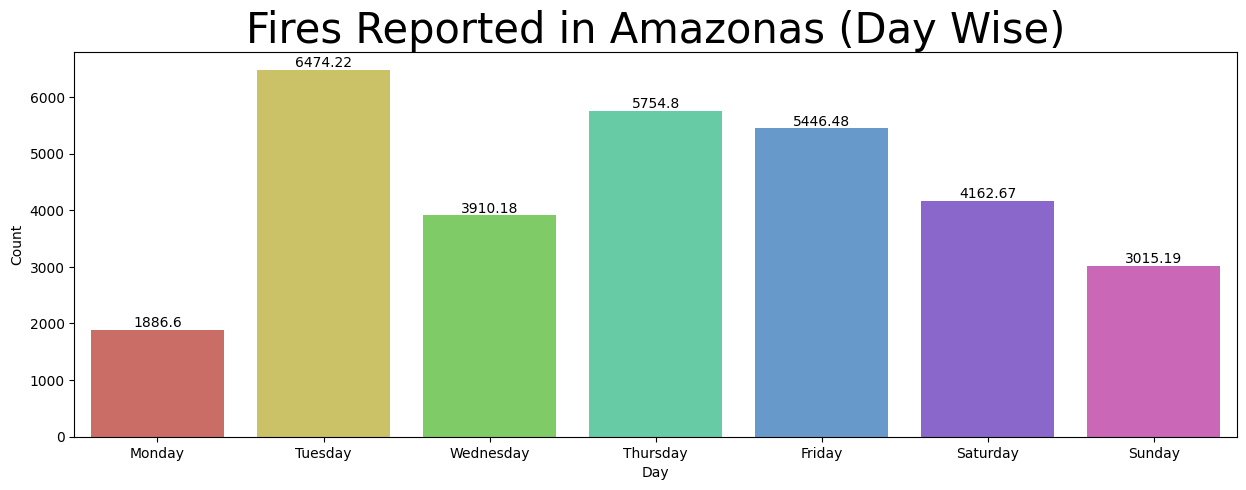

In [36]:
plt.figure(figsize= (15,5))
ax= sns.barplot(data= day, x= 'day_name', y= 'number', palette= "hls")
plt.title('Fires Reported in Amazonas (Day Wise)', size= 30)
plt.xlabel('Day')
plt.ylabel('Count')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

## **According to the bar chart we can see the most fires were reported on Tuesday**

# **Find Total Number of Fires Were Reported in 2015 and Visualize Data Based on Each Month**

In [27]:
df_2015 = df[df['year'] == 2015]
df_2015

,year,state,month,number,date,month_eng
17,2015,Acre,Janeiro,1.000,2015-01-01,Jan
37,2015,Acre,Fevereiro,2.000,2015-01-01,Feb
57,2015,Acre,Março,2.000,2015-01-01,Mar
77,2015,Acre,Abril,3.000,2015-01-01,April
97,2015,Acre,Maio,2.000,2015-01-01,May
...,...,...,...,...,...,...
6372,2015,Tocantins,Agosto,2.540,2015-01-01,Aug
6392,2015,Tocantins,Setembro,5.510,2015-01-01,Sep
6412,2015,Tocantins,Outubro,4.844,2015-01-01,Oct
6432,2015,Tocantins,Novembro,833.000,2015-01-01,Nov


<ipython-input-37-3ff9c18b29eb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data= df_2015_mon, x= 'month_eng', y= 'number', palette= "hls")


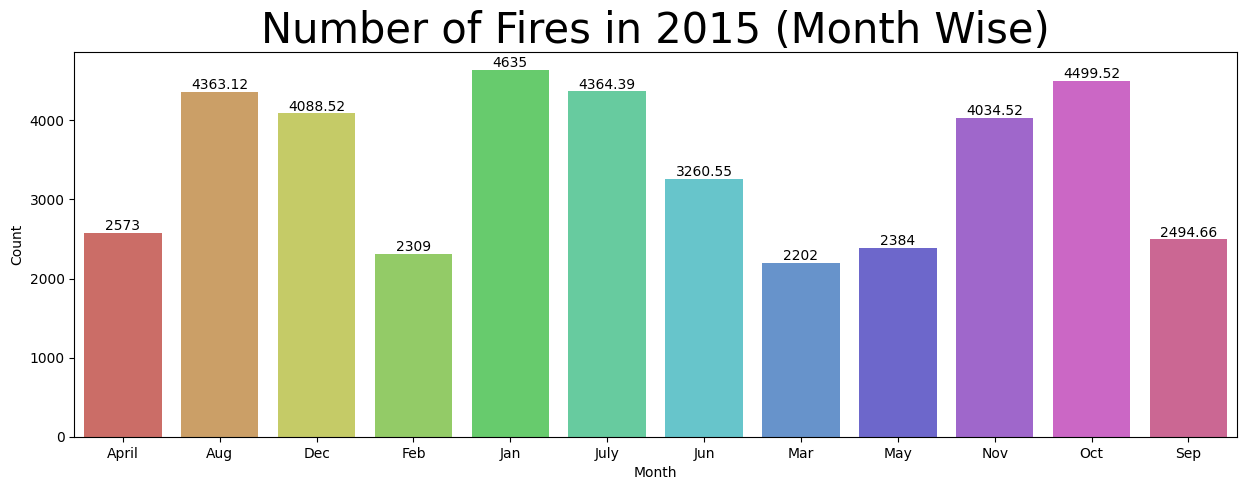

In [37]:
df_2015_mon = df_2015.groupby('month_eng', as_index= False)['number'].sum()

plt.figure(figsize= (15,5))
ax= sns.barplot(data= df_2015_mon, x= 'month_eng', y= 'number', palette= "hls")
plt.title('Number of Fires in 2015 (Month Wise)', size= 30)
plt.xlabel('Month')
plt.ylabel('Count')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# **Find Average Number of Fires Were Reported from Highest to Lowest (State Wise)**

In [29]:
Average_df = df.groupby('state', as_index= False)['number'].mean().sort_values('number', ascending= False)
Average_df

,state,number
20,Sao Paulo,213.896226
10,Mato Grosso,203.479975
4,Bahia,187.222703
15,Piau,158.174674
8,Goias,157.721841
11,Minas Gerais,156.800243
22,Tocantins,141.037176
3,Amazonas,128.243218
5,Ceara,127.314071
12,Paraiba,111.073979


<ipython-input-38-23eafb48c111>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data= Average_df, x= 'state', y= 'number', palette= "hls")


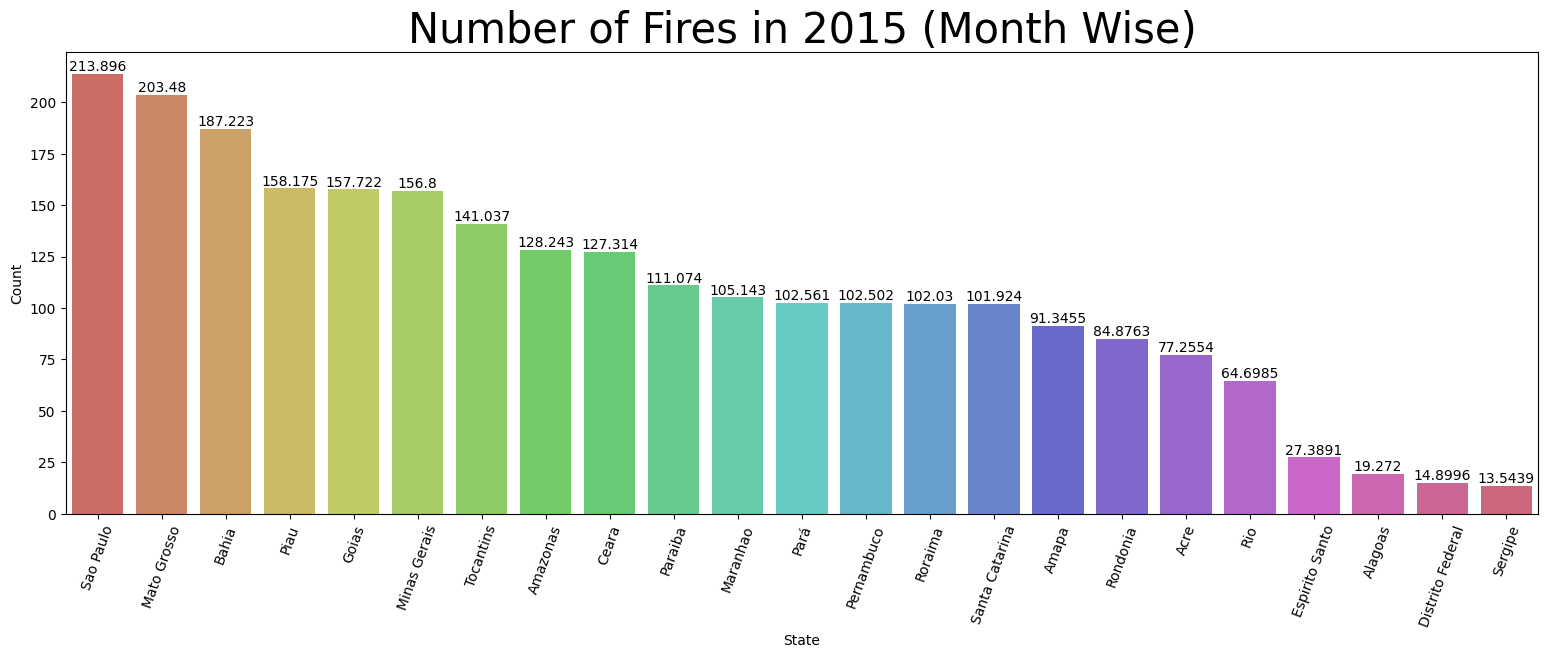

In [38]:
plt.figure(figsize= (19,6))
ax= sns.barplot(data= Average_df, x= 'state', y= 'number', palette= "hls")
plt.title('Number of Fires in 2015 (Month Wise)', size= 30)
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation= 70)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# <span style='color:Red'> Find The State Names Where Fires Were Reported in 'Dec' Month</span>

In [31]:
dec_state_df = df[df['month_eng'] == 'Dec']['state'].unique()
dec_state_df

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)